            TOTAL CASES
TIME                   
2010-10-10         45.0
2010-10-17         67.0
2010-10-24         62.0
2010-10-31         88.0
2010-11-07        134.0
...                 ...
2021-09-26         29.0
2021-10-03         46.0
2021-10-10         58.0
2021-10-17         45.0
2021-10-24         25.0

[575 rows x 1 columns]
TOTAL CASES    1936.046957
dtype: float64
done
575
predicted=4.007581, expected=3.300185
predicted=2.823557, expected=2.992163
predicted=2.729523, expected=3.425627
predicted=3.657870, expected=4.076213
predicted=4.487385, expected=4.935610
predicted=5.479849, expected=4.940804
predicted=4.834443, expected=4.664727
predicted=4.444271, expected=4.154387
predicted=3.815586, expected=3.552628
predicted=3.244257, expected=3.126436
predicted=2.921987, expected=2.457150
predicted=2.078000, expected=0.865358
predicted=-0.230978, expected=-0.243884
predicted=-0.933997, expected=-0.425165
predicted=-0.415889, expected=-0.473732
predicted=-0.443870, expected=-0.4815

/Users/amypaul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.500151, expected=-0.499963
predicted=-0.500014, expected=-0.498665
predicted=-0.497652, expected=-0.501262
predicted=-0.503308, expected=-0.500743
predicted=-0.500018, expected=-0.500223
predicted=-0.500031, expected=-0.501522
predicted=-0.502369, expected=-0.499444
predicted=-0.497841, expected=-0.500223
predicted=-0.501100, expected=-0.499963
predicted=-0.499554, expected=-0.500743
predicted=-0.501488, expected=-0.495289
predicted=-0.491130, expected=-0.498665
predicted=-0.501877, expected=-0.492951
predicted=-0.488196, expected=-0.488536


/Users/amypaul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.486417, expected=-0.490094
predicted=-0.491385, expected=-0.492951
predicted=-0.495076, expected=-0.492951
predicted=-0.492681, expected=-0.488796
predicted=-0.485658, expected=-0.484121
predicted=-0.481167, expected=-0.481264
predicted=-0.479773, expected=-0.489055
predicted=-0.495182, expected=-0.479706
predicted=-0.471950, expected=-0.477108
predicted=-0.476627, expected=-0.475290
predicted=-0.473668, expected=-0.477108
predicted=-0.479234, expected=-0.471395
predicted=-0.466859, expected=-0.484900
[4.007580708659107, 2.823556534732867, 2.7295228892963133, 3.6578698304809176, 4.487384501059501, 5.479849473579122, 4.834443295807922, 4.444271392465293, 3.8155860793298744, 3.2442572391891704, 2.921987428882372, 2.078000239642769, -0.23097769321860406, -0.933997202184437, -0.41588865870090597, -0.4438703377956197, -0.470493724728522, -0.5284185248242574, -0.49760817686213105, -0.4992660370217348, -0.49927806760442184, -0.4995563611496304, -0.5031917337762893, -0.49400609008

ValueError: x and y must have same first dimension, but have shapes (52,) and (54,)

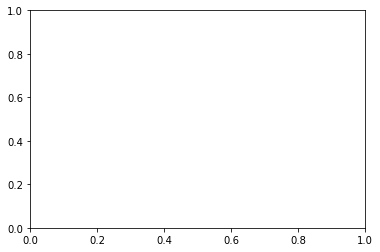

In [8]:
import matplotlib.pyplot as plt
import pandas
from datetime import datetime
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
datafile = 'preprocessed_data.csv'

def splitData(data, n):
    return data[:-n], data[-n:]

if __name__ == '__main__':
    # Convert data to datetime
    data = pandas.read_csv(datafile)
    data["YEAR"] = data["YEAR"].astype(str) + " " + data["WEEK"].astype(str)
    for i in range(data.shape[0]):
        data.at[i, "YEAR"] = datetime.strptime(data.at[i, "YEAR"] + ' 0', "%Y %W %w")
    data = data.drop(columns=["WEEK", "REGION"])
    data = data.rename(columns={"YEAR": "TIME"})
    new_data = data.groupby(["TIME"]).sum()["TOTAL CASES"]
    new_data.to_csv("arima_test.csv")
    new_data = pandas.read_csv("arima_test.csv", header=0, index_col=0)
    print(new_data)
    mean = new_data.mean()
    print(mean)
    std = new_data.std()
    new_data = (new_data - mean) / std 
    n = 52
    print('done')
    X = new_data.values
    size = 380
    print(len(X))
    train, test = X[0:size], X[481:533]
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    # evaluate forecasts
    weeks = [i for i in range(52)]
    print(predictions)
    predictions = np.array(predictions) * std["TOTAL CASES"] + mean["TOTAL CASES"]
    print(predictions)
    test = np.array(test) * std["TOTAL CASES"] + mean["TOTAL CASES"]
    plt.plot(weeks, predictions, label="pred", color="blue")
    plt.plot(weeks, test, label="true", color="red")
    plt.title(f"SARIMA 2019 Week 40 to 2020 Week 39")
    week_labels = [i % 52 + 1 for i in range(39, 52+39, 4)]
    plt.xticks(weeks[::4], week_labels)
    plt.legend()
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    # # plot forecasts against actual outcomes
    # plt.plot(test)
    # plt.plot(predictions, color='red')
    # plt.show()